# benchmark evaluation

In [43]:
from typing import List
from random import randint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Markdown as md
 
# configs 
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["figure.autolayout"] = True
plt.style.use('seaborn-v0_8-darkgrid')

In [44]:
df = pd.read_csv("data/benchmark_HarstemsAunt_v1.1_dev.csv")

df.head()

,benchmark,bot_version,comment,branch,map,start_pos,started_at,enemy_behavior,has_creep,enemy_units,own_units,time_running,score,life_damage_dealt,shield_damage_dealt,life_damage_taken,shield_damage_taken,destroyed_enemy_units,destroyed_friendly_units,end_condition
0,Stalker_vs_STALKER,should now run all benchmarks,1.1_dev,06c7bd6d76eb7e6dd80452cc7fd84357882f33ab,Automaton AIE,center,2025-03-18 16:12:12.011384,attack_closest,False,"[[UnitTypeId.STALKER, 8]]","[[UnitTypeId.STALKER, 8]]",21.562500,-600,495.0,620.0,640.000,640.000,5,8,EndCondition.DEFEAT
1,Stalker_vs_STALKER,should now run all benchmarks,1.1_dev,06c7bd6d76eb7e6dd80452cc7fd84357882f33ab,Automaton AIE,enemy_spawn,2025-03-18 16:12:40.136767,attack_closest,False,"[[UnitTypeId.STALKER, 8]]","[[UnitTypeId.STALKER, 8]]",23.214286,700,640.0,643.5,485.125,613.875,8,4,EndCondition.VICTORY
2,Stalker_vs_STALKER,should now run all benchmarks,1.1_dev,06c7bd6d76eb7e6dd80452cc7fd84357882f33ab,Automaton AIE,ramp_top,2025-03-18 16:13:06.090866,attack_closest,False,"[[UnitTypeId.STALKER, 8]]","[[UnitTypeId.STALKER, 8]]",22.544643,-700,545.5,566.5,640.000,640.000,5,8,EndCondition.DEFEAT
3,Stalker_vs_STALKER,should now run all benchmarks,1.1_dev,06c7bd6d76eb7e6dd80452cc7fd84357882f33ab,Automaton AIE,center,2025-03-18 16:14:43.205682,attack_closest,False,"[[UnitTypeId.STALKER, 8]]","[[UnitTypeId.STALKER, 8]]",21.875000,-600,514.0,620.0,640.000,640.000,5,8,EndCondition.DEFEAT
4,Stalker_vs_STALKER,should now run all benchmarks,1.1_dev,06c7bd6d76eb7e6dd80452cc7fd84357882f33ab,Automaton AIE,enemy_spawn,2025-03-18 16:15:28.137836,attack_closest,False,"[[UnitTypeId.STALKER, 8]]","[[UnitTypeId.STALKER, 8]]",24.464286,525,640.0,640.0,446.125,634.875,8,5,EndCondition.VICTORY


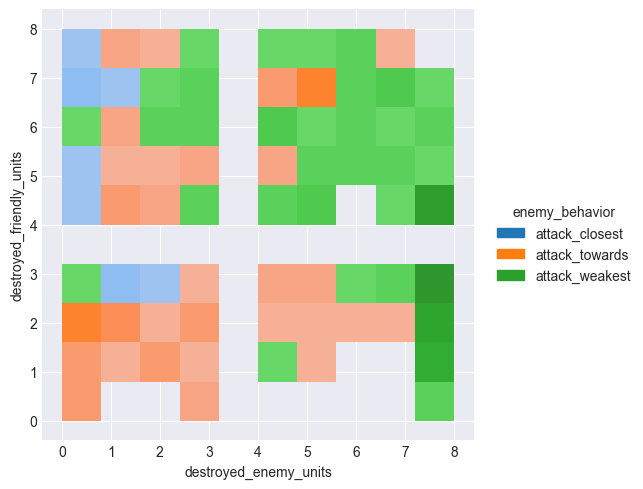

In [45]:
sns.displot(df, x="destroyed_enemy_units", y="destroyed_friendly_units", hue="enemy_behavior")

plt.grid(True)
plt.show()

In [46]:
#df = df[df['end_condition'] != 'EndCondition.TIME_OUT']

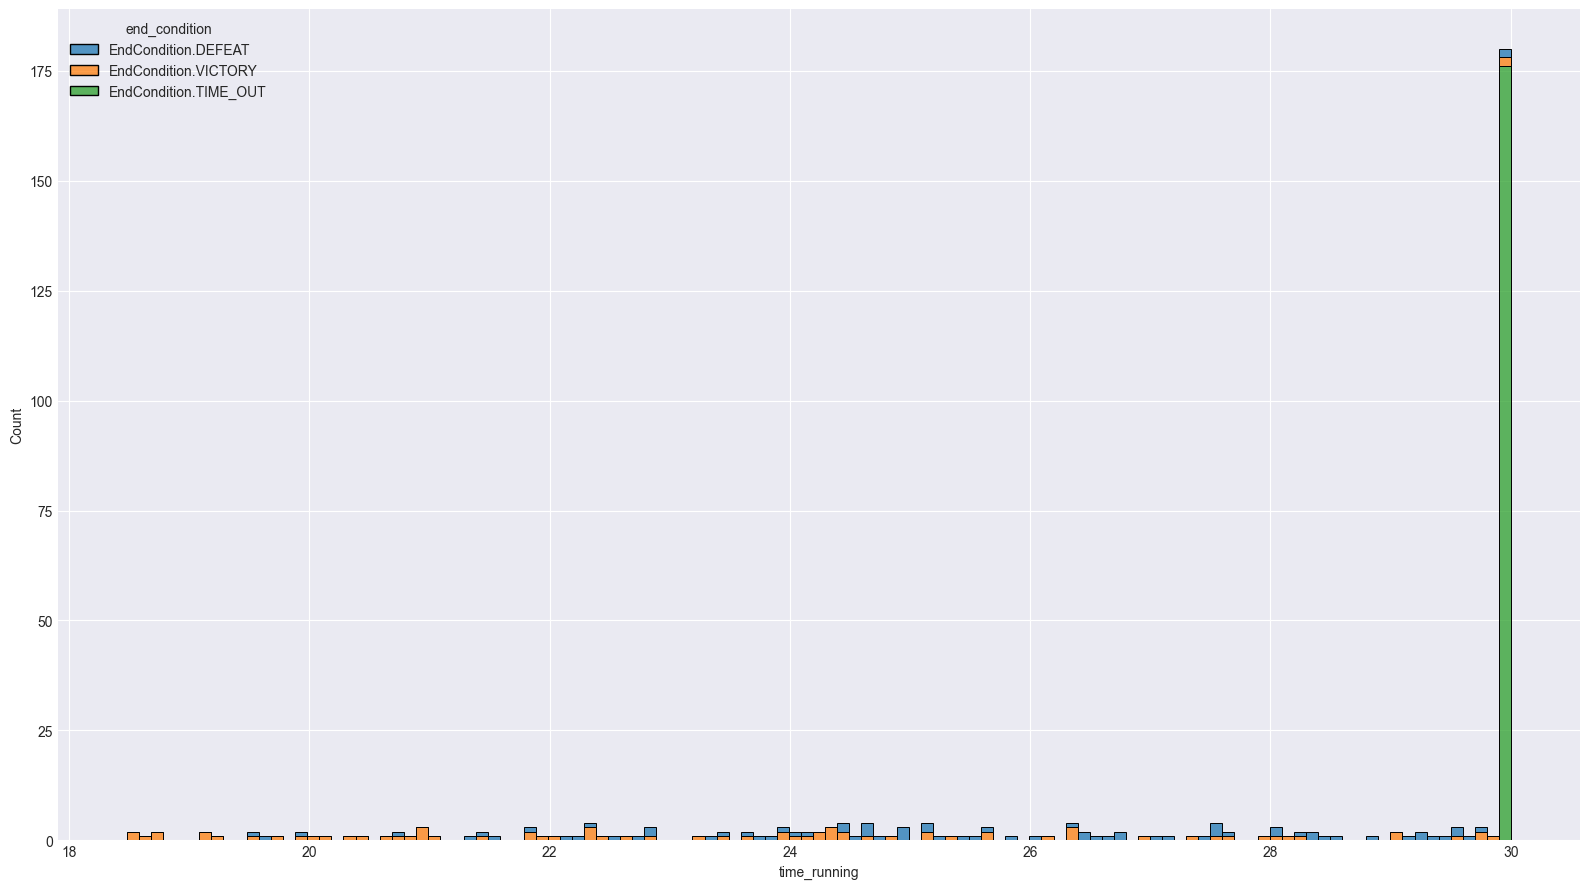

In [47]:
sns.histplot(df, x='time_running', binwidth=.1, hue="end_condition", multiple="stack")

plt.grid(True)
plt.show()

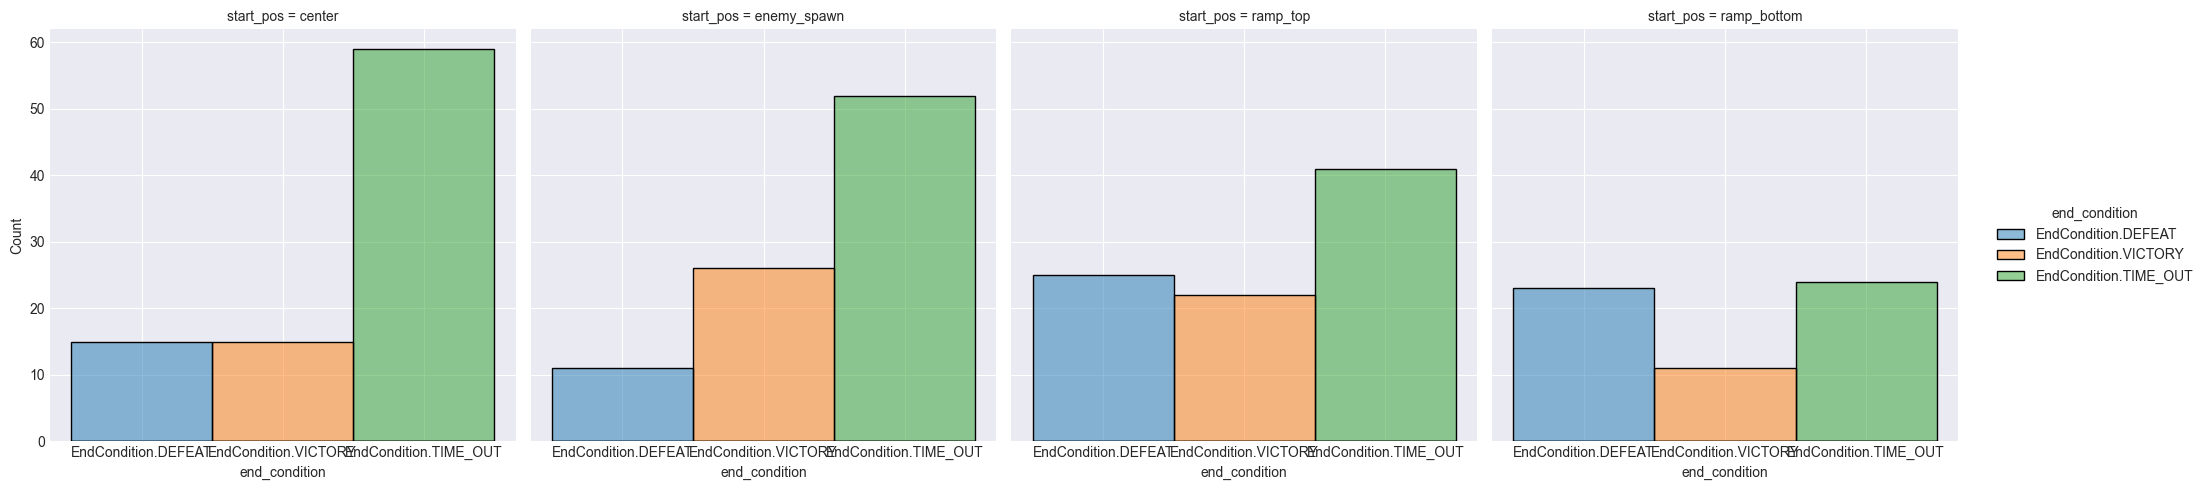

In [48]:
sns.displot(df, x='end_condition', col="start_pos",hue="end_condition",binwidth=10)

plt.grid(True)
plt.show()

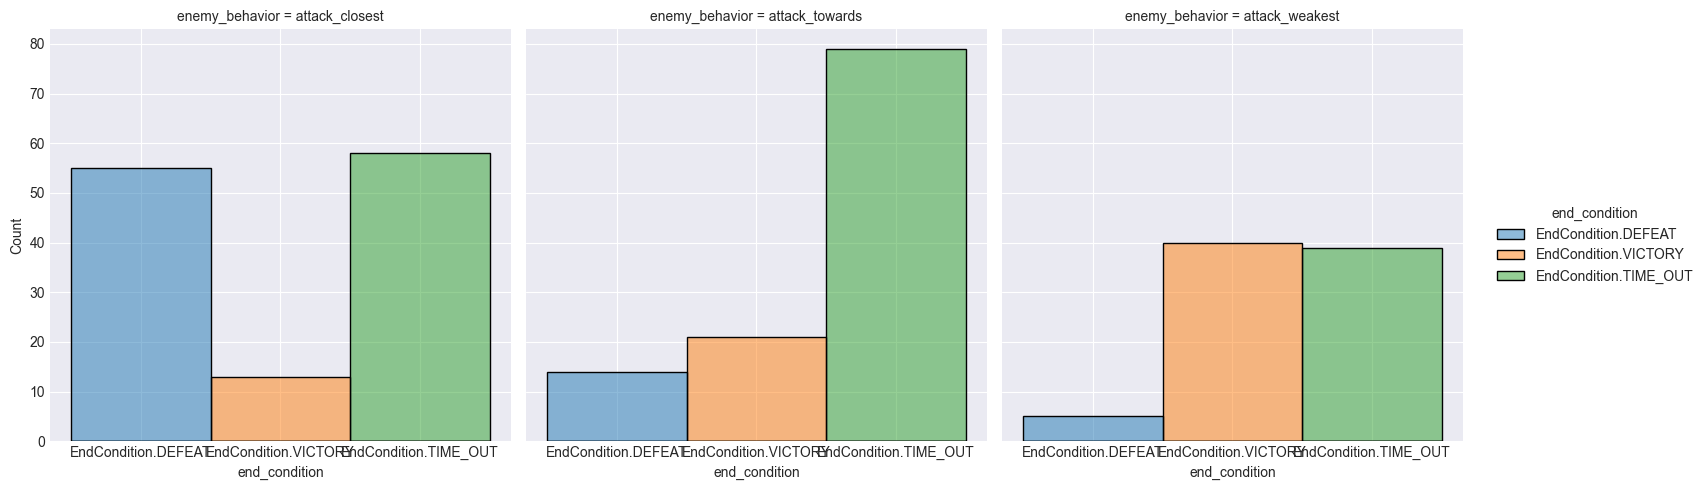

In [49]:
sns.displot(df, x='end_condition', col="enemy_behavior",hue="end_condition",binwidth=10)

plt.grid(True)
plt.show()

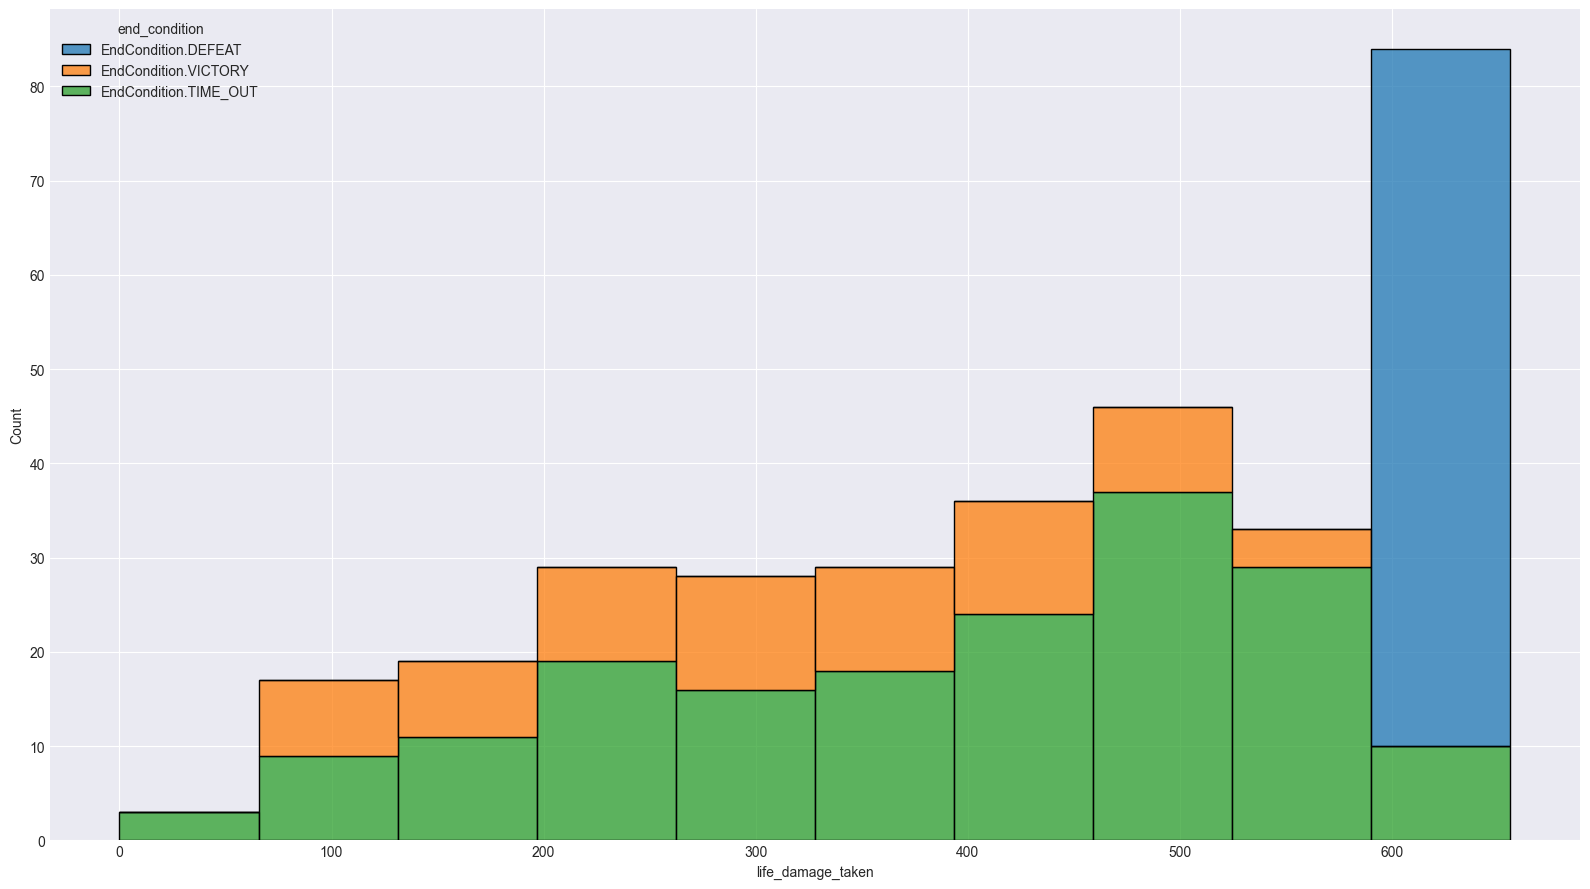

In [50]:
sns.histplot(df, x='life_damage_taken', hue='end_condition',multiple="stack")

plt.grid(True)
plt.show()


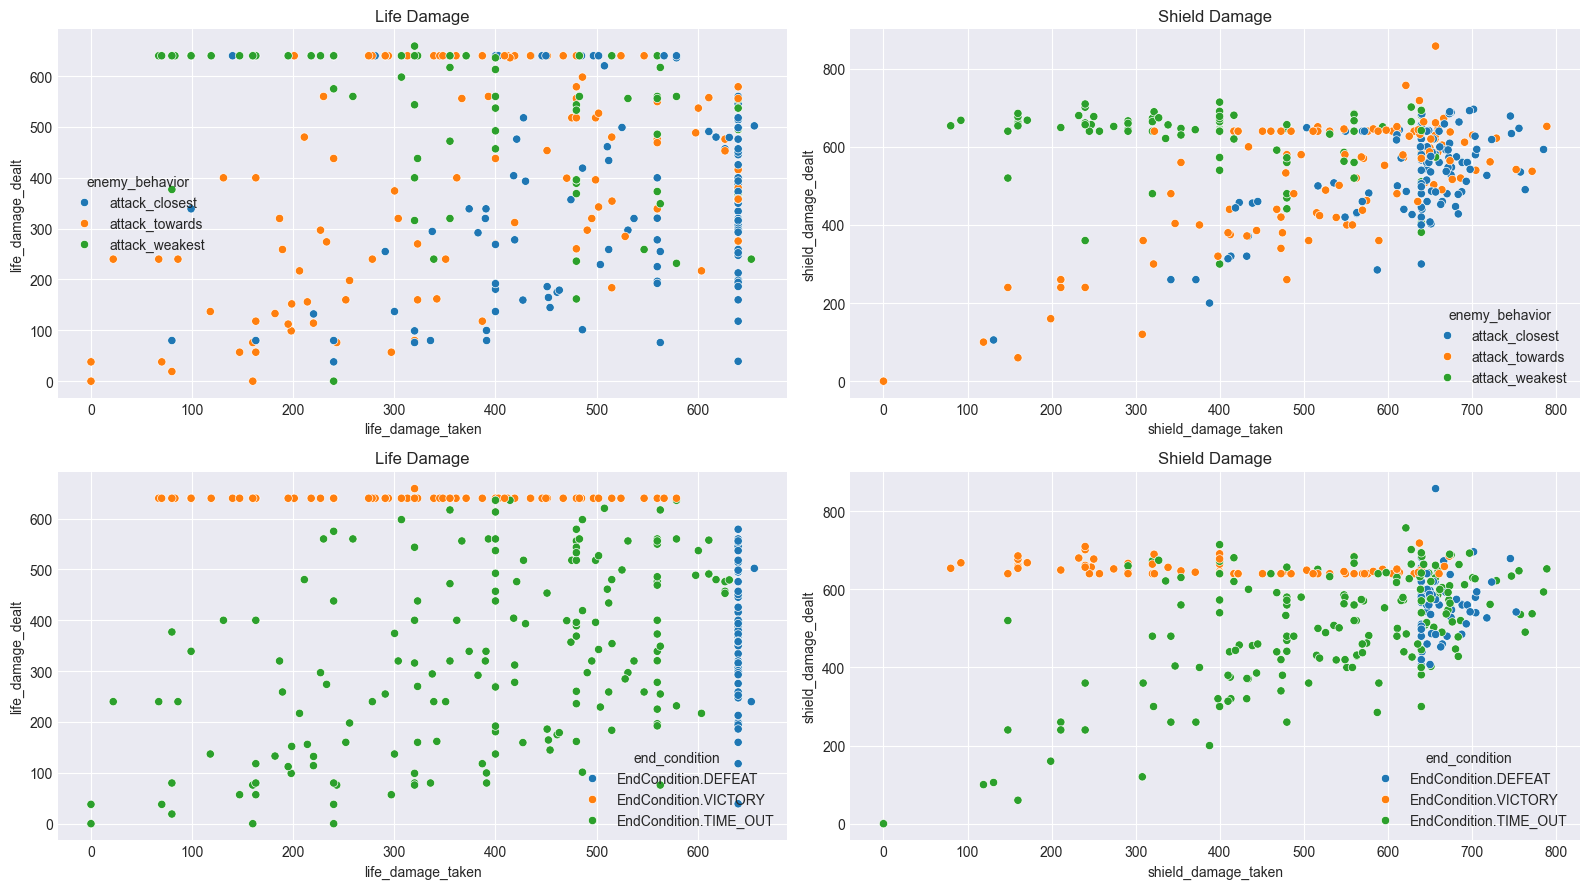

In [51]:
fig, axes = plt.subplots(2, 2) #Increased figure height

sns.scatterplot(data=df, x="life_damage_taken", y="life_damage_dealt", hue="enemy_behavior", ax=axes[0, 0])
axes[0, 0].set_title("Life Damage")

sns.scatterplot(data=df, x="shield_damage_taken", y="shield_damage_dealt", hue="enemy_behavior", ax=axes[0, 1])
axes[0, 1].set_title("Shield Damage")

sns.scatterplot(data=df, x="life_damage_taken", y="life_damage_dealt", hue="end_condition", ax=axes[1, 0])
axes[1, 0].set_title("Life Damage")

sns.scatterplot(data=df, x="shield_damage_taken", y="shield_damage_dealt", hue="end_condition", ax=axes[1, 1])
axes[1, 1].set_title("Shield Damage")

plt.tight_layout()
plt.show()

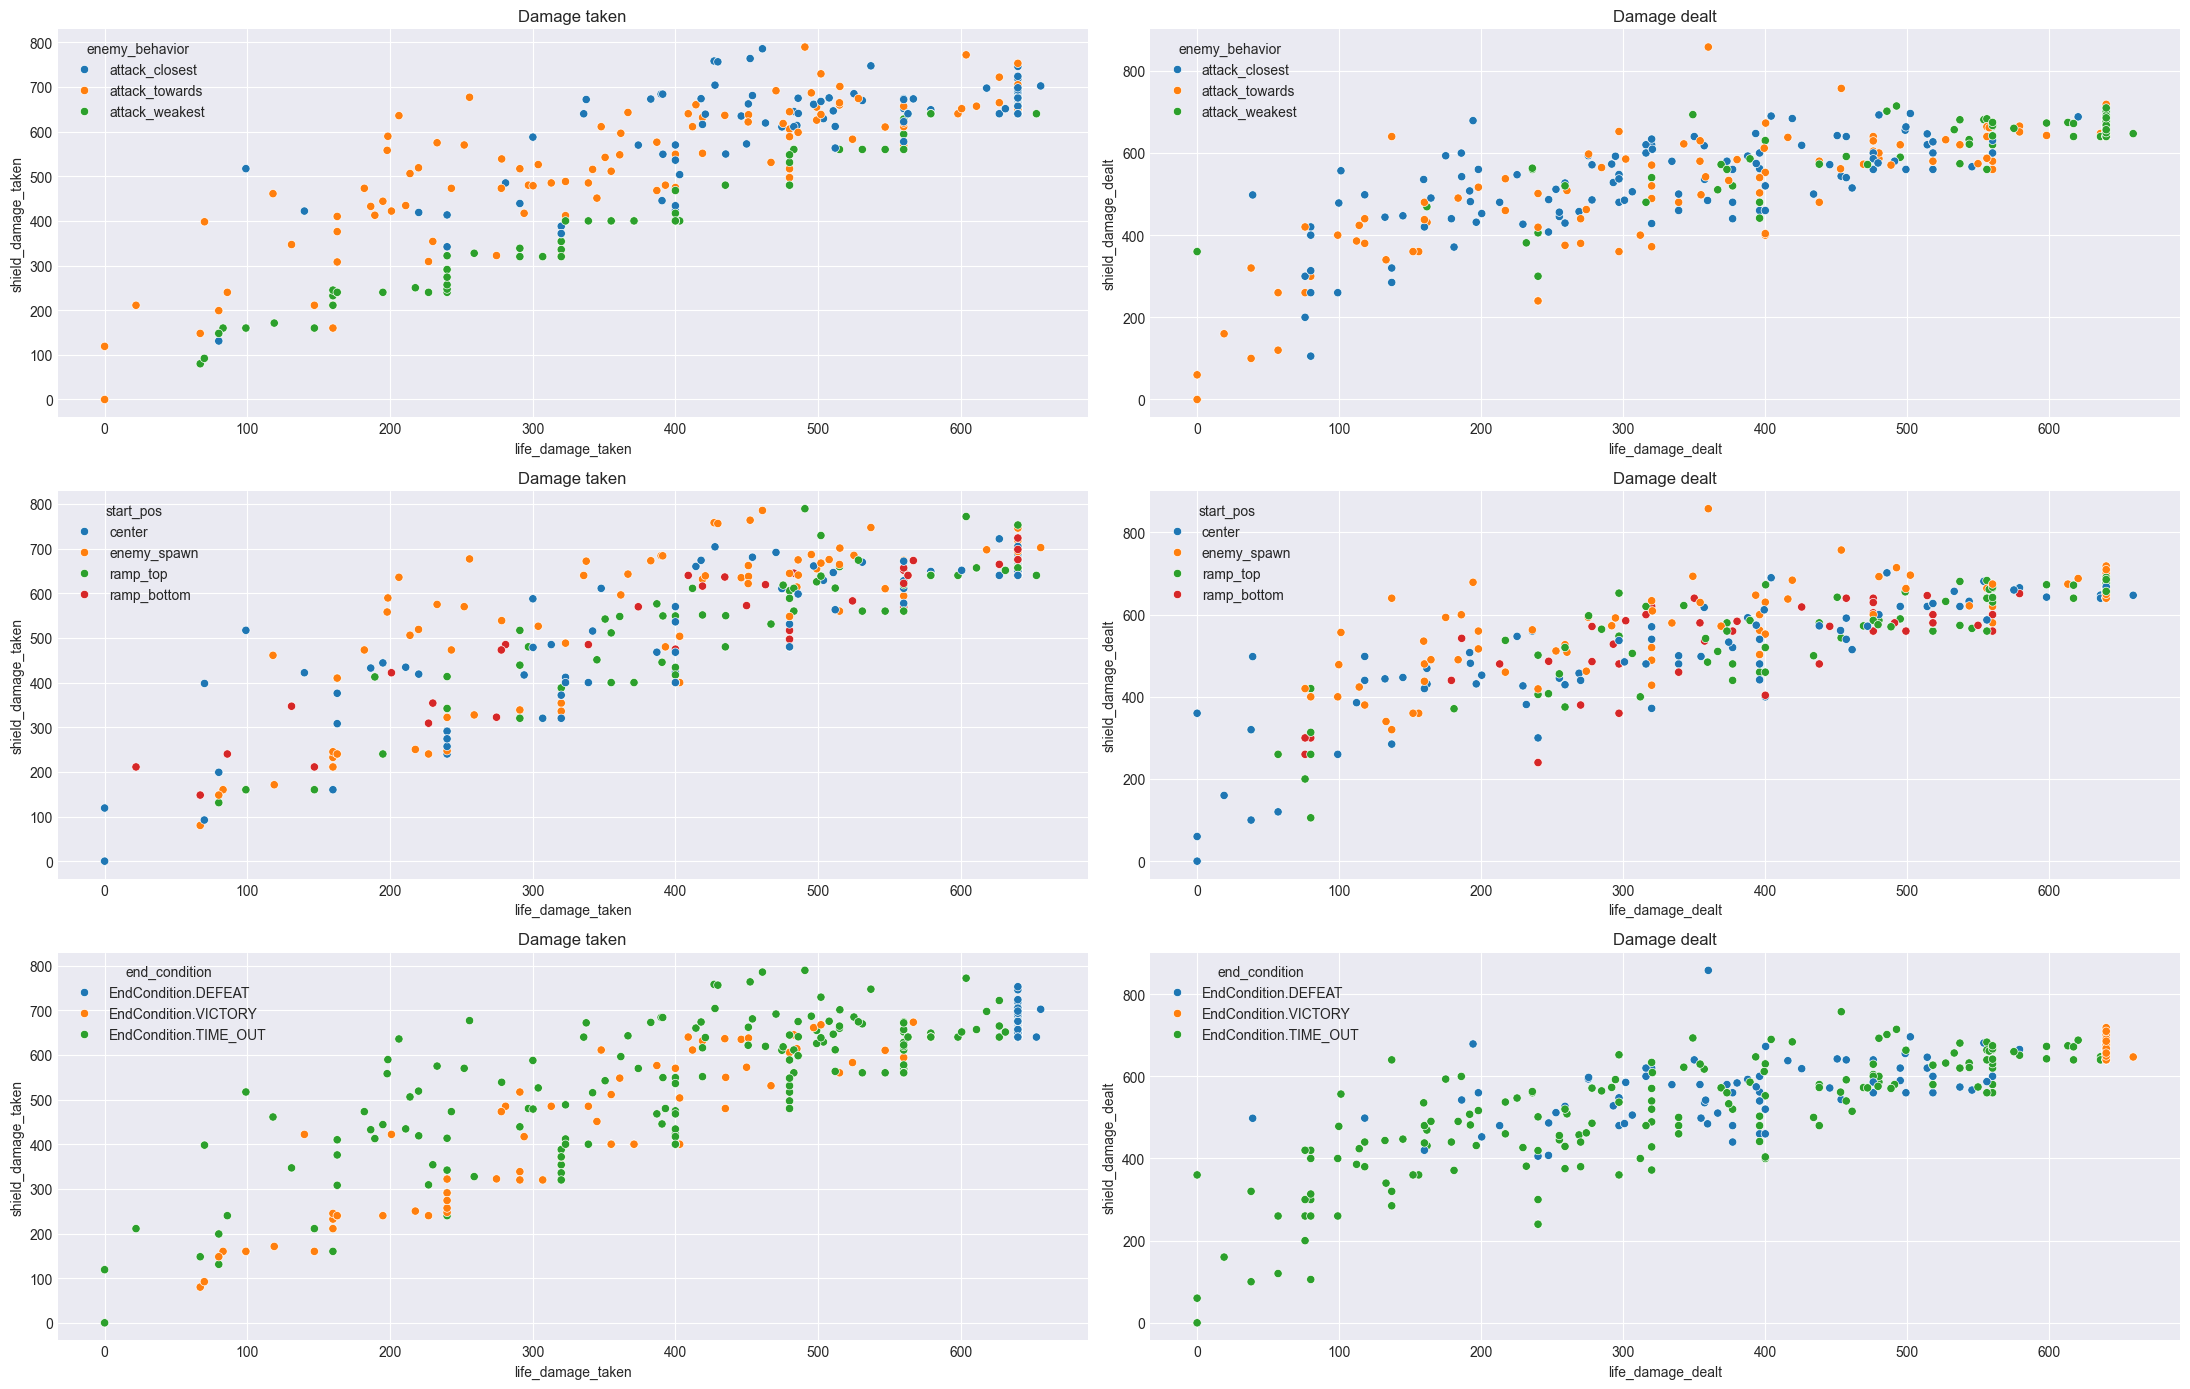

In [52]:
fig, axes = plt.subplots(3, 2, figsize=(22, 14)) #Increased figure height

sns.scatterplot(data=df, x="life_damage_taken", y="shield_damage_taken", hue="enemy_behavior", ax=axes[0, 0])
#sns.lineplot(data=df, x="life_damage_taken", y="shield_damage_taken", hue="enemy_behavior", ax=axes[0, 0])
axes[0, 0].set_title("Damage taken")

sns.scatterplot(data=df, x="life_damage_dealt", y="shield_damage_dealt", hue="enemy_behavior", ax=axes[0,1])
#sns.lineplot(data=df, x="life_damage_dealt", y="shield_damage_dealt", hue="enemy_behavior", ax=axes[0,1])
axes[0, 1].set_title("Damage dealt")

sns.scatterplot(data=df, x="life_damage_taken", y="shield_damage_taken", hue="start_pos", ax=axes[1, 0])
axes[1, 0].set_title("Damage taken")

sns.scatterplot(data=df, x="life_damage_dealt", y="shield_damage_dealt", hue="start_pos", ax=axes[1,1])
axes[1, 1].set_title("Damage dealt")

sns.scatterplot(data=df, x="life_damage_taken", y="shield_damage_taken", hue="end_condition", ax=axes[2, 0])
axes[2, 0].set_title("Damage taken")

sns.scatterplot(data=df, x="life_damage_dealt", y="shield_damage_dealt", hue="end_condition", ax=axes[2,1])
axes[2, 1].set_title("Damage dealt")

plt.tight_layout()
plt.show()